# **CREDIT CARD FRAUD DETECTION SYSTEM**


### CONTENTS
###### *1) Install and Import Libraries*
###### *2) Dataset Loading and Analysis*
###### *3) Dataframe Visualization*
###### *4) Feature Selection*
###### *5) Model Training and Testing*

In [1]:
# Upload "creditcard.csv" from local system
from google.colab import files
uploaded = files.upload()

Saving creditcard.csv to creditcard.csv


## 1) INSTALL AND IMPORT LIBRARIES

In [2]:
# Installing seaborn, pandas, matplotlib and sklearn
!pip install seaborn 
!pip install pandas
!pip install matplotlib
!pip install sklearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for sklearn: filename=sklearn-0.0.post1-py3-none-any.whl size=2955 sha256=85acd65bd70edb786c9f33f720dc9c0ac856767a314b4bd1faa459bba3a4b9ae
  Stored in directory: /root/.cache/pip/wheels/f8/e0/3d/9d0c2020c44a519b9f02ab4fa6d2a4a996c98d79ab2f569fa1
Successfully built sklearn


In [3]:
import seaborn as sns
import pandas as pd
from sklearn.neighbors import LocalOutlierFactor
from sklearn.ensemble import IsolationForest
from sklearn.metrics import classification_report, accuracy_score
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt

## 2) DATASET LOADING AND ANALYSIS

In [4]:
# Load Dataset into a dataframeframe using pandas
dataframe = pd.read_csv('creditcard.csv')

# Columns/features in our Dataset
print(dataframe.columns) 

# Number of rows and columns in our dataset
print("\nShape of the Dataset: ", dataframe.shape) 

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

Shape of the Dataset:  (284807, 31)


In [5]:
# First five records
dataframe.head() 

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [6]:
# Last five records
dataframe.tail() 

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


In [7]:
# Using 30% of our dataset for next steps
dataframe = dataframe.sample(frac = 0.3, random_state = 42) 

# Print the shape of the dataframe
print("Shape of the Dataset: ", dataframe.shape)

Shape of the Dataset:  (85442, 31)


In [8]:
# Determine number of fraud cases in Dataset
Fraud = dataframe[dataframe['Class'] == 1]
Valid = dataframe[dataframe['Class'] == 0]
outlier_fraction = (len(Fraud)/float(len(Valid)))

print('Valid Transactions: {}'.format(len(dataframe[dataframe['Class'] == 0])))
print('Fraud Cases: {}'.format(len(dataframe[dataframe['Class'] == 1])))
print("Outlier_fraction: {0} %".format(outlier_fraction*100))

# The columns have been encrypted using PCA Dimensionality reduction to protect user identities and sensitive features
print("\n\nDescription of the Dataset:\n ", dataframe.describe())

Valid Transactions: 85306
Fraud Cases: 136
Outlier_fraction: 0.15942606616181745 %


Description of the Dataset:
                  Time            V1            V2            V3            V4  \
count   85442.000000  85442.000000  85442.000000  85442.000000  85442.000000   
mean    94967.874862      0.003465      0.005440     -0.004776      0.002485   
std     47520.526676      1.953426      1.611981      1.520529      1.413738   
min         0.000000    -37.558067    -48.060856    -33.680984     -5.600607   
25%     54257.500000     -0.918861     -0.597627     -0.898758     -0.845937   
50%     84962.000000      0.027558      0.063774      0.172342     -0.015543   
75%    139498.000000      1.318759      0.804713      1.024434      0.748582   
max    172787.000000      2.439207     21.467203      9.382558     12.699542   

                 V5            V6            V7            V8            V9  \
count  85442.000000  85442.000000  85442.000000  85442.000000  85442.000000   
mean  

## 3) DATAFRAME VISUALIZATION

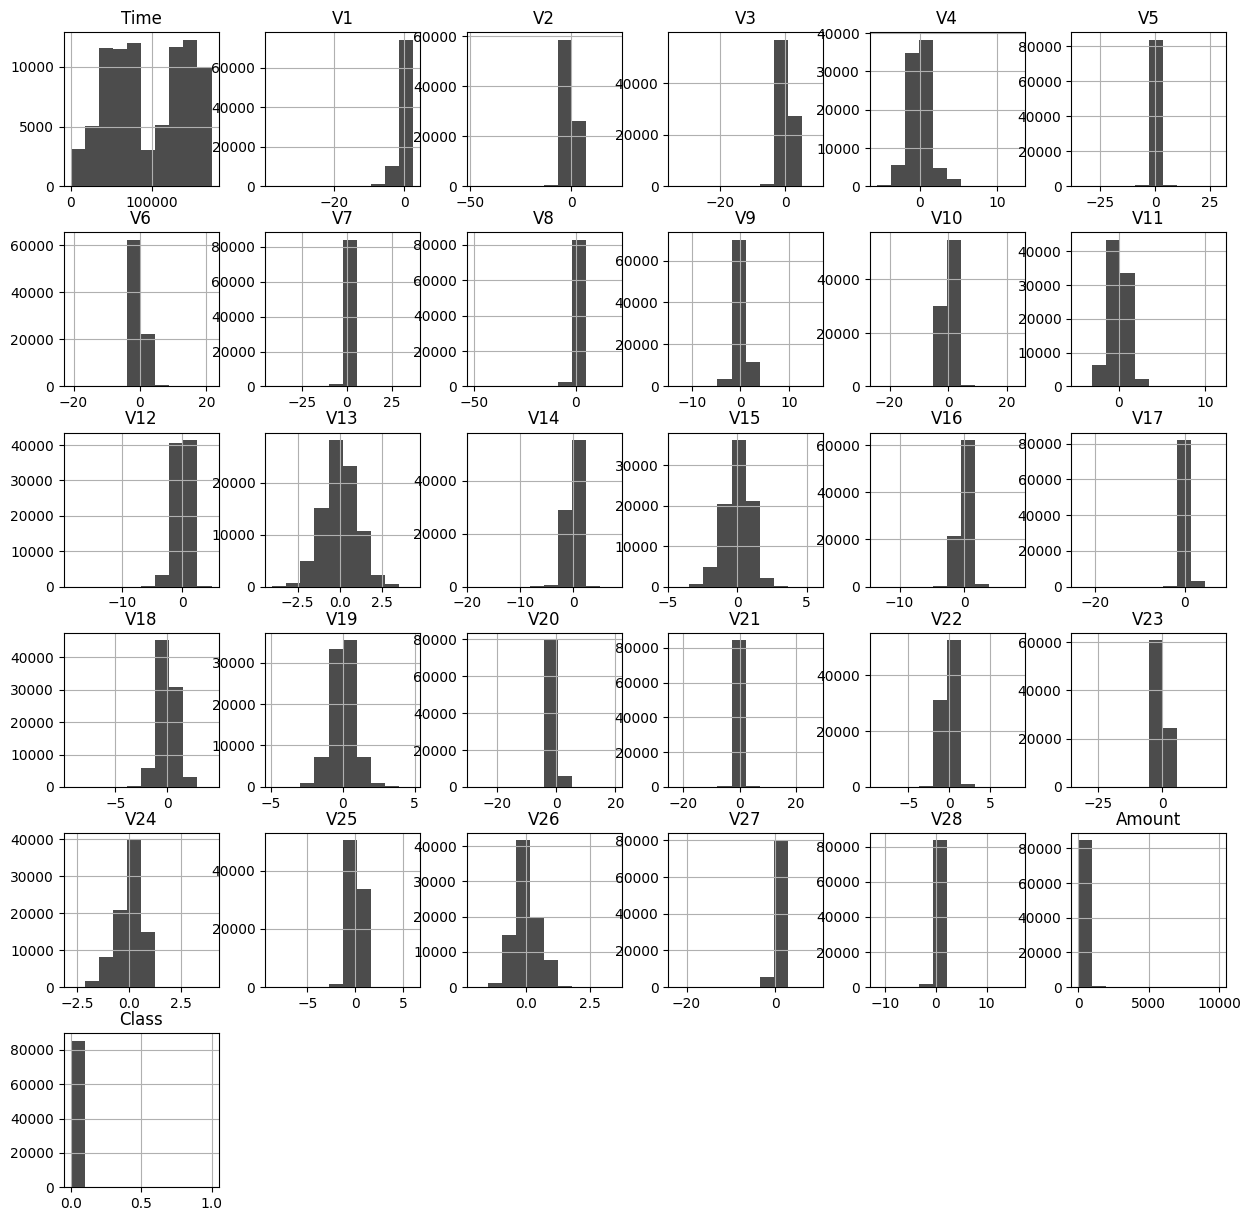

In [9]:
# Plot histograms for each parameter 
dataframe.hist(figsize=(15, 15), bins=10, color='black', alpha=0.7)
plt.show()

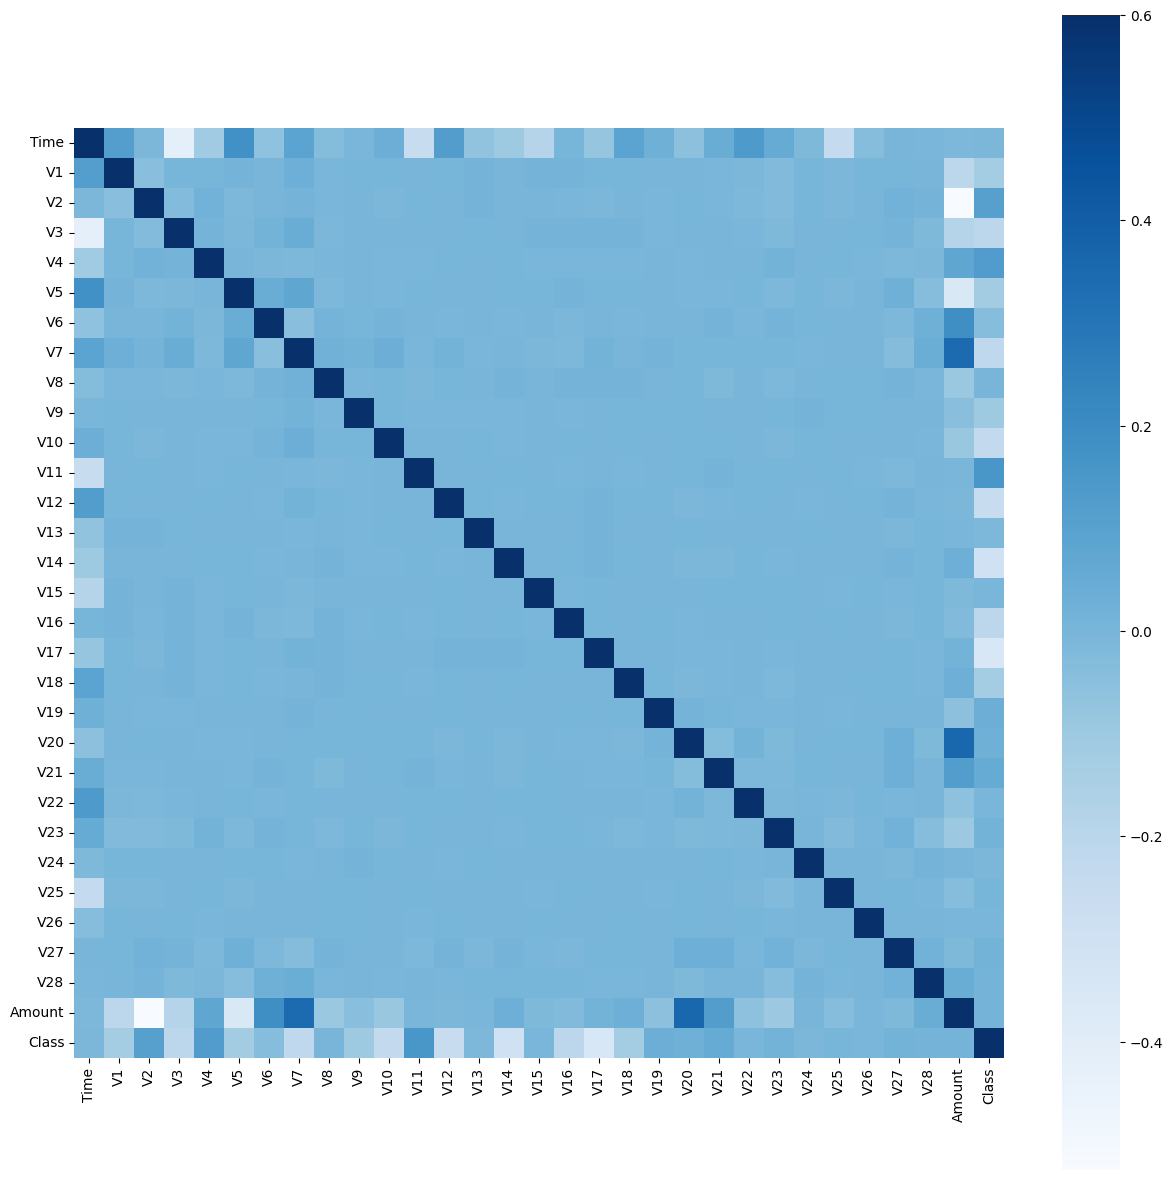

In [10]:
# Correlation matrix
corrmat = dataframe.corr()
fig = plt.figure(figsize = (15, 15))

# Plotting a heatmap to visualize the correlation matrix and see features 
# with strong correlation to the target class
# vmax is the max and min value you want to have for the scale
sns.heatmap(corrmat, vmax=.6, square=True, cmap="Blues")
plt.show()


In [11]:
# Retrieve the correlation values between the "Class" column and all other columns in the dataframe
corrmat['Class']

Time     -0.008402
V1       -0.121864
V2        0.105051
V3       -0.208042
V4        0.128095
V5       -0.118543
V6       -0.038185
V7       -0.217359
V8       -0.001888
V9       -0.099826
V10      -0.228272
V11       0.153159
V12      -0.256577
V13      -0.012188
V14      -0.294882
V15      -0.006388
V16      -0.205082
V17      -0.345739
V18      -0.121619
V19       0.034440
V20       0.025939
V21       0.052617
V22      -0.003520
V23       0.011271
V24      -0.006823
V25       0.005641
V26      -0.002010
V27       0.013635
V28       0.007974
Amount    0.009849
Class     1.000000
Name: Class, dtype: float64

In [12]:
# Length of the correlation values between the "Class" column and all other columns in the dataframe
len(corrmat['Class'])

31

## 4) FEATURE SELECTION

In [13]:
# Get column names from correlation matrix
cols = corrmat.columns

# Create list of columns to keep based on correlation with 'Class' greater than 0.01
cols_to_keep = [col for col in cols if abs(corrmat.loc[col, 'Class']) > 0.01]

# The final features list we wish to keep
len(cols_to_keep) 

22

In [14]:
# List of column names that have a correlation with the target variable "Class" greater than 0.01
cols_to_keep

['V1',
 'V2',
 'V3',
 'V4',
 'V5',
 'V6',
 'V7',
 'V9',
 'V10',
 'V11',
 'V12',
 'V13',
 'V14',
 'V16',
 'V17',
 'V18',
 'V19',
 'V20',
 'V21',
 'V23',
 'V27',
 'Class']

In [15]:
# Removing the 'Class' columnn from the features list, as it is the variable we wish to predict
cols = cols_to_keep[:-1]

# Records of all transactions, excluding the target class
features = dataframe[cols] 

# Records of the corresponding label for each record
target = dataframe["Class"] 

print(features.shape)
print(target.shape)

(85442, 21)
(85442,)


## 5) MODEL TRAINING AND TESTING

In [16]:
# Define random state
random_state = 1

# Define outlier detection tools to be compared
classifiers = {
    "Isolation Forest": IsolationForest(
        n_estimators=100,
        max_samples=len(features),
        contamination=outlier_fraction,
        random_state=random_state),
    "Local Outlier Factor": LocalOutlierFactor(
        n_neighbors=20,
        contamination=outlier_fraction)}

In [17]:
n_outliers = len(Fraud)

# Fit the model and tag outliers
for clf_name, clf in classifiers.items():
    
    # Fit the classifier to the features and get outlier scores/predictions
    if clf_name == "Local Outlier Factor":
        y_pred = clf.fit_predict(features)
        scores_pred = clf.negative_outlier_factor_
        
    else:
        clf.fit(features)
        scores_pred = clf.decision_function(features)
        y_pred = clf.predict(features)

    # Reshape the prediction values to 0 for valid transactions and 1 for fraudulent transactions
    y_pred[y_pred == 1] = 0
    y_pred[y_pred == -1] = 1
    
    n_errors = (y_pred != target).sum()
    
    # Print classification metrics
    print(f"Classifier {clf_name}:")
    print(f"Number of errors: {n_errors}")
    print(f"Accuracy: {accuracy_score(target, y_pred)*100:.2f}%\n")
    print(classification_report(target, y_pred))

Classifier Isolation Forest:
Number of errors: 173
Accuracy: 99.80%

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85306
           1       0.36      0.37      0.37       136

    accuracy                           1.00     85442
   macro avg       0.68      0.68      0.68     85442
weighted avg       1.00      1.00      1.00     85442

Classifier Local Outlier Factor:
Number of errors: 273
Accuracy: 99.68%

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85306
           1       0.00      0.00      0.00       136

    accuracy                           1.00     85442
   macro avg       0.50      0.50      0.50     85442
weighted avg       1.00      1.00      1.00     85442

